In [ ]:
import pandas as pd

In [ ]:
#Dados referentes ao intervalo do dia 10/10 à 11/10 de 2025
dataFrame = pd.read_csv("/content/bdqueimadas.494025.csv")
dataFrame

#verificando se existe dados faltantes
hasNum = dataFrame.isna().sum()
print(hasNum)

#não existe dados faltantes mas para garantir aplicando o dropna
dfTeste = dataFrame.copy()
dfTeste.dropna(axis=1, inplace=True)

print(dfTeste)

#Visualizando as informações do dataset
dfTeste.info()

DataHora        0
Satelite        0
Pais            0
Estado          0
Municipio       0
Bioma           0
DiaSemChuva     0
Precipitacao    0
RiscoFogo       0
FRP             0
Latitude        0
Longitude       0
dtype: int64
                DataHora  Satelite    Pais             Estado  \
0    2025/10/10 18:19:00  AQUA_M-T  Brasil  RIO GRANDE DO SUL   
1    2025/10/10 18:19:00  AQUA_M-T  Brasil  RIO GRANDE DO SUL   
2    2025/10/10 18:19:00  AQUA_M-T  Brasil  RIO GRANDE DO SUL   
3    2025/10/10 18:19:00  AQUA_M-T  Brasil  RIO GRANDE DO SUL   
4    2025/10/10 18:19:00  AQUA_M-T  Brasil          SÃO PAULO   
..                   ...       ...     ...                ...   
379  2025/10/10 20:02:00  AQUA_M-T  Brasil               ACRE   
380  2025/10/10 20:02:00  AQUA_M-T  Brasil               ACRE   
381  2025/10/10 20:02:00  AQUA_M-T  Brasil               ACRE   
382  2025/10/10 20:02:00  AQUA_M-T  Brasil               ACRE   
383  2025/10/10 20:02:00  AQUA_M-T  Brasil              

## Identificação de colunas numéricas

Determinação de quais colunas no DataFrame são numéricas e adequadas para detecção de outliers.

In [ ]:
# Identificar colunas numéricas
colunas_numericas = dfTeste.select_dtypes(include=['int64', 'float64']).columns
print("Colunas numéricas:")
print(colunas_numericas)

Colunas numéricas:
Index(['DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'FRP', 'Latitude',
       'Longitude'],
      dtype='object')


## Detecção e visualização de outliers

Identificação e visualização possíveis outliers nas colunas numéricas usando boxplots.

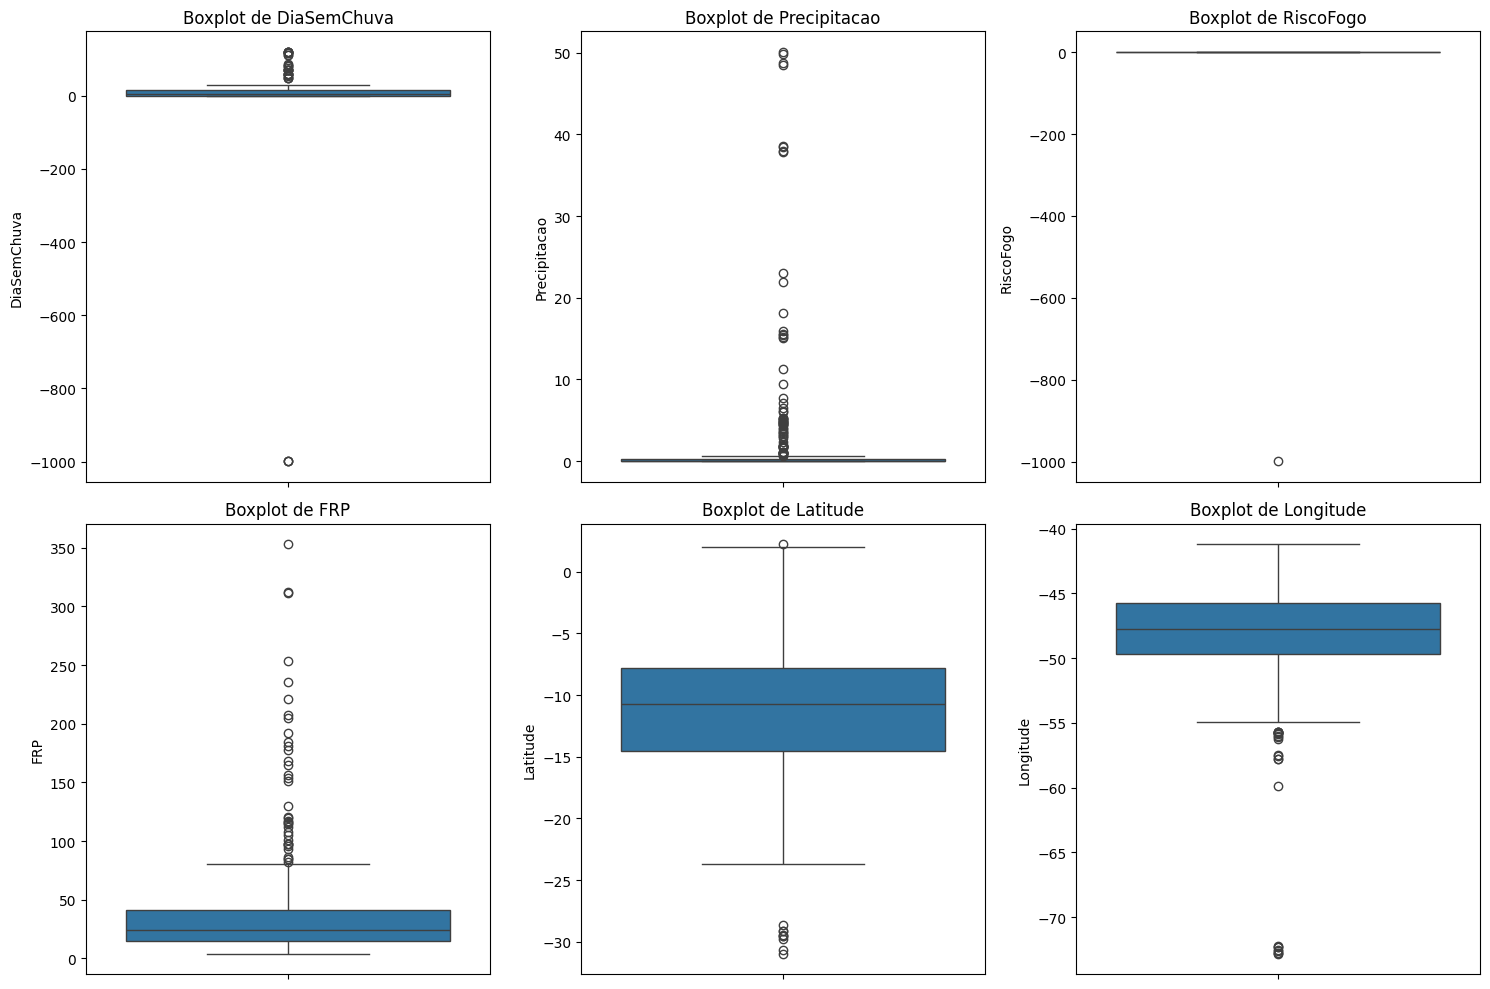

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar boxplots para visualizar outliers nas colunas numéricas
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(2, 3, i + 1) # Ajuste o grid conforme o número de colunas numéricas
    sns.boxplot(y=dfTeste[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.ylabel(coluna)
plt.tight_layout()
plt.show()

## Normalização de outliers (Capping)
Aplicação do capping (limitação) nos valores outliers identificados nas colunas numéricas.

In [ ]:
dfTeste_normalized = dfTeste.copy() # Cópia para não modificar o DataFrame original

colunas_numericas_para_normalizacao = colunas_numericas # Usando as colunas numéricas identificadas anteriormente

for col in colunas_numericas_para_normalizacao:
  q1 = dfTeste_normalized[col].quantile(0.25)
  q3 = dfTeste_normalized[col].quantile(0.75)
  iqr = q3 - q1

  ilim = q1 - 1.5 * iqr
  hlim = q3 + 1.5 * iqr

  # Ajustando os valores abaixo do limite inferior
  dfTeste_normalized.loc[dfTeste_normalized[col] < ilim, col] = ilim
  # Ajustando os valores acima do limite superior
  dfTeste_normalized.loc[dfTeste_normalized[col] > hlim, col] = hlim

print("Outliers normalizados (capping) aplicados.")

Outliers normalizados (capping) aplicados.


## Visualização de dados após normalização de outliers

Plotar boxplots para visualizar a distribuição dos dados nas colunas numéricas após a normalização dos outliers.

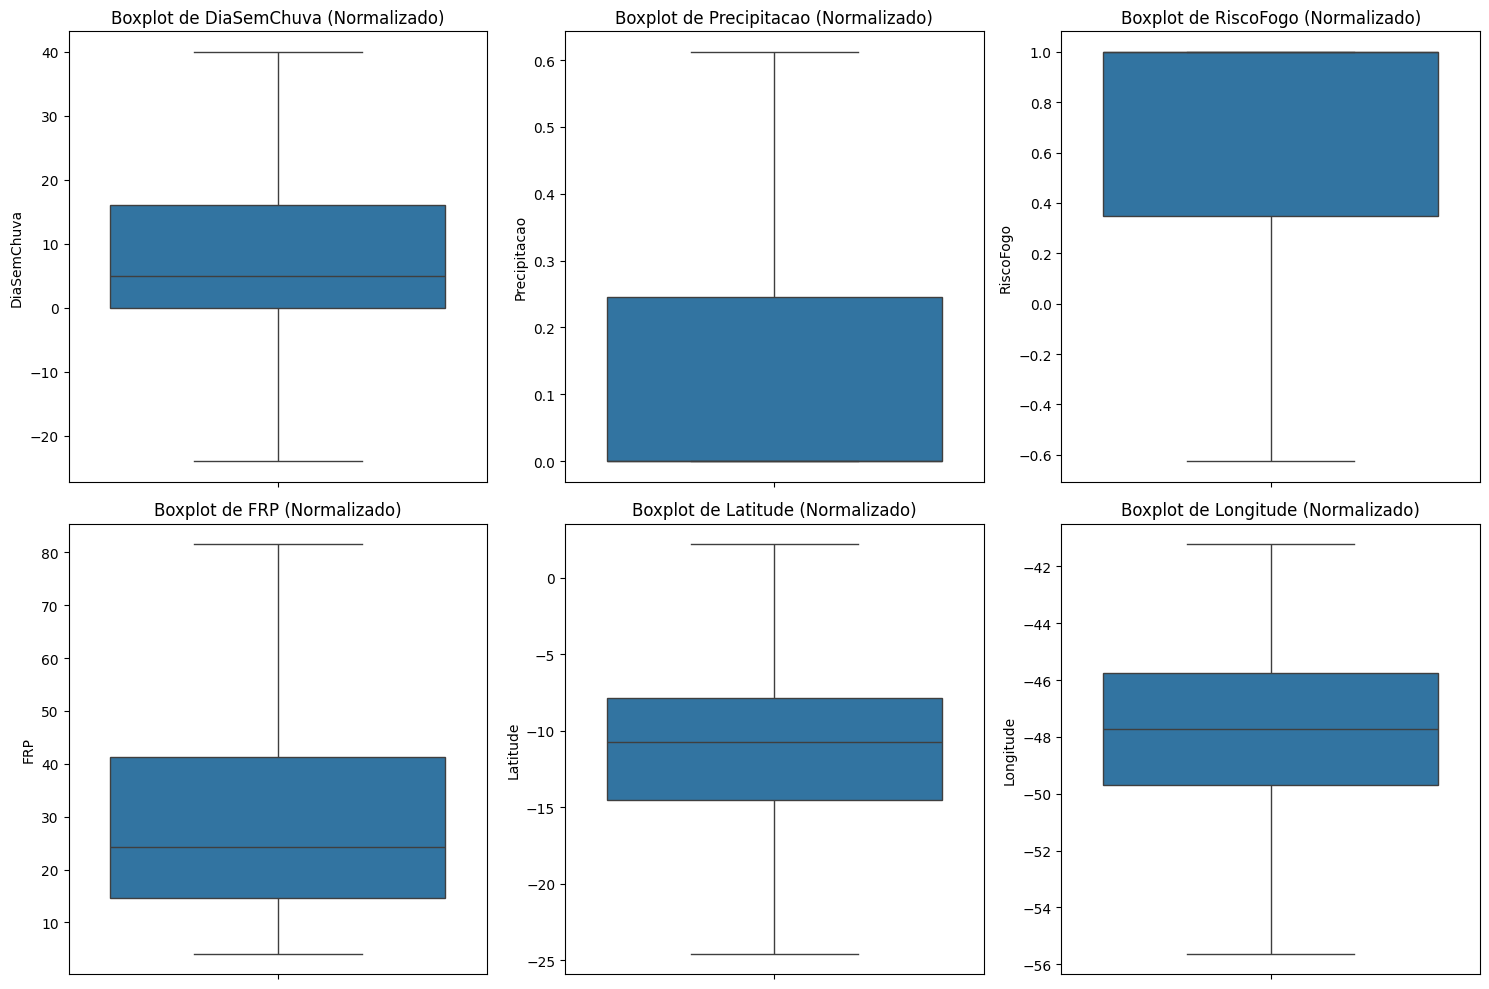

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar boxplots para visualizar a distribuição após a normalização de outliers
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(colunas_numericas_para_normalizacao):
    plt.subplot(2, 3, i + 1) # Ajuste o grid conforme o número de colunas numéricas
    sns.boxplot(y=dfTeste_normalized[coluna])
    plt.title(f'Boxplot de {coluna} (Normalizado)')
    plt.ylabel(coluna)
plt.tight_layout()
plt.show()

In [ ]:
# Selecionando colunas númericas para normalizar
colunas_numericas_normalized = dfTeste_normalized.select_dtypes(include=['int64', 'float64']).columns

# Calculando correlação das matriz
correlation_matrix = dfTeste_normalized[colunas_numericas_normalized].corr()

# Exibção da correlação
display(correlation_matrix)

,DiaSemChuva,Precipitacao,RiscoFogo,FRP,Latitude,Longitude
DiaSemChuva,1.000000,-0.291712,0.445462,0.408621,-0.296589,0.583824
Precipitacao,-0.291712,1.000000,-0.500628,-0.176002,0.333685,-0.338335
RiscoFogo,0.445462,-0.500628,1.000000,0.292376,-0.174805,0.459276
FRP,0.408621,-0.176002,0.292376,1.000000,-0.095833,0.359743
Latitude,-0.296589,0.333685,-0.174805,-0.095833,1.000000,-0.311091
Longitude,0.583824,-0.338335,0.459276,0.359743,-0.311091,1.000000


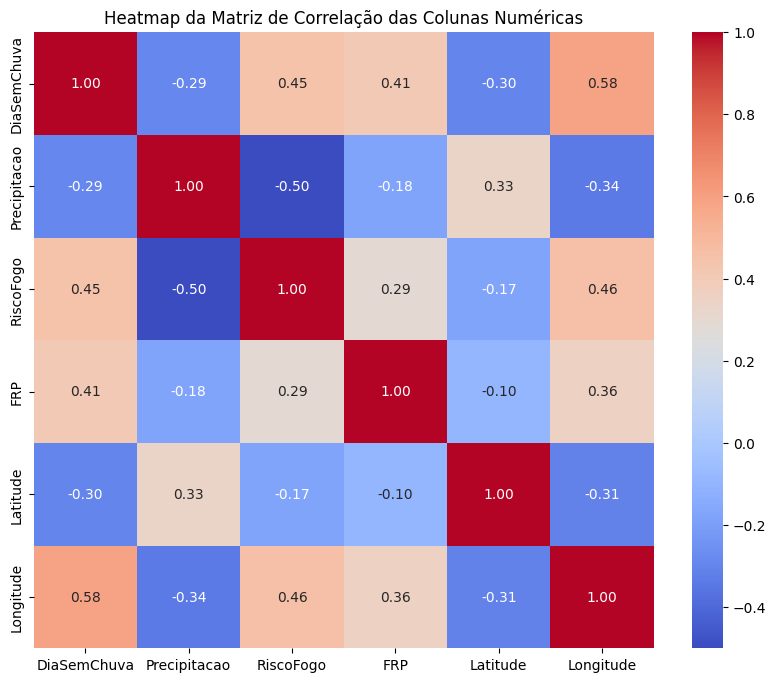

In [ ]:
# Criação e plot de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Matriz de Correlação das Colunas Numéricas')
plt.show()

In [ ]:
# Formato de exibição mais organizado
display(dfTeste_normalized.describe())

# Colunas categóricas
category_columns = dfTeste_normalized.select_dtypes(include='object').columns
print("\nColunas categóricas:")
print(category_columns)

,DiaSemChuva,Precipitacao,RiscoFogo,FRP,Latitude,Longitude
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,9.291667,0.152741,0.716549,31.163444,-10.964964,-47.865174
std,11.615167,0.246115,0.390956,22.371105,5.091077,3.477439
min,-24.000000,0.000000,-0.625000,4.100000,-24.566209,-55.631741
25%,0.000000,0.000000,0.350000,14.575000,-14.533297,-49.706490
50%,5.000000,0.000000,1.000000,24.200000,-10.753530,-47.721035
75%,16.000000,0.245000,1.000000,41.350000,-7.844690,-45.756323
max,40.000000,0.612500,1.000000,81.512500,2.188221,-41.218490



Colunas categóricas:
Index(['DataHora', 'Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma'], dtype='object')


**Reasoning**:
Iterate through the identified categorical columns and print the number of unique values and their value counts.



In [ ]:
# Print dos valores para cada coluna categórica
for coluna in category_columns:
    print(f"\nColuna: {coluna}")
    print(f"Número de valores únicos: {dfTeste_normalized[coluna].nunique()}")
    print("Contagem de valores:")
    display(dfTeste_normalized[coluna].value_counts())


Coluna: DataHora
Número de valores únicos: 5
Contagem de valores:


,count
DataHora,
2025/10/10 18:24:00,199
2025/10/10 18:21:00,147
2025/10/10 18:19:00,15
2025/10/10 18:26:00,15
2025/10/10 20:02:00,8



Coluna: Satelite
Número de valores únicos: 1
Contagem de valores:


,count
Satelite,
AQUA_M-T,384



Coluna: Pais
Número de valores únicos: 1
Contagem de valores:


,count
Pais,
Brasil,384



Coluna: Estado
Número de valores únicos: 15
Contagem de valores:


,count
Estado,
TOCANTINS,103
PARÁ,66
BAHIA,52
MINAS GERAIS,40
MARANHÃO,34
GOIÁS,31
MATO GROSSO,15
PIAUÍ,14
RIO GRANDE DO SUL,9



Coluna: Municipio
Número de valores únicos: 165
Contagem de valores:


,count
Municipio,
PARANÃ,12
SÃO FÉLIX DO XINGU,10
PRESIDENTE JÂNIO QUADROS,9
BOM JESUS DA LAPA,8
JABORANDI,8
...,...
RIO MARIA,1
TARTARUGALZINHO,1
SALVATERRA,1



Coluna: Bioma
Número de valores únicos: 6
Contagem de valores:


,count
Bioma,
Cerrado,227
Amazônia,96
Caatinga,41
Mata Atlântica,15
Pampa,3
Pantanal,2


/tmp/ipython-input-2225501047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Bioma', data=dfTeste_normalized, order=dfTeste_normalized['Bioma'].value_counts().index, palette='viridis')


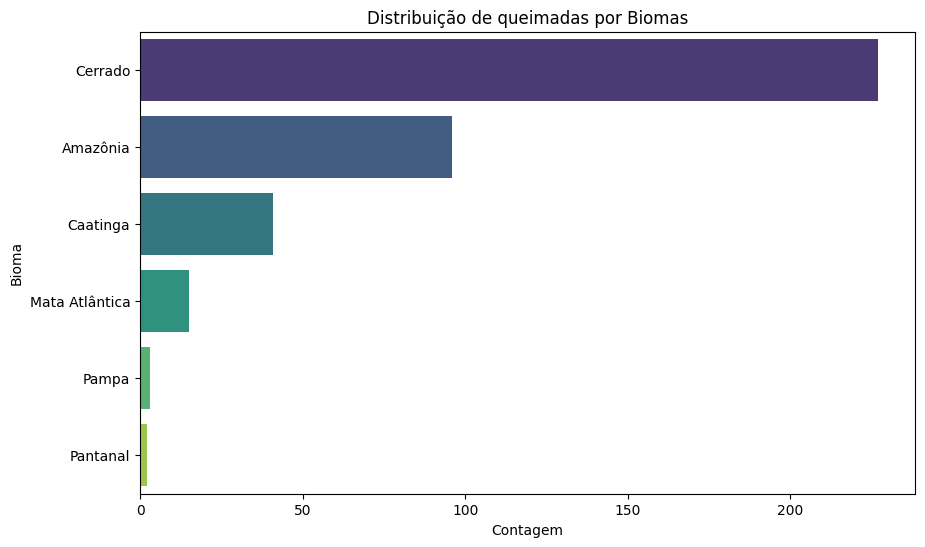

In [ ]:
# Gráfico de barras horizontais dos biomas
plt.figure(figsize=(10, 6))
sns.countplot(y='Bioma', data=dfTeste_normalized, order=dfTeste_normalized['Bioma'].value_counts().index, palette='viridis')
plt.title('Distribuição de queimadas por Biomas')
plt.xlabel('Contagem')
plt.ylabel('Bioma')
plt.show()

/tmp/ipython-input-3905671414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Estado', data=dfTeste_normalized, order=dfTeste_normalized['Estado'].value_counts().index, palette='viridis')


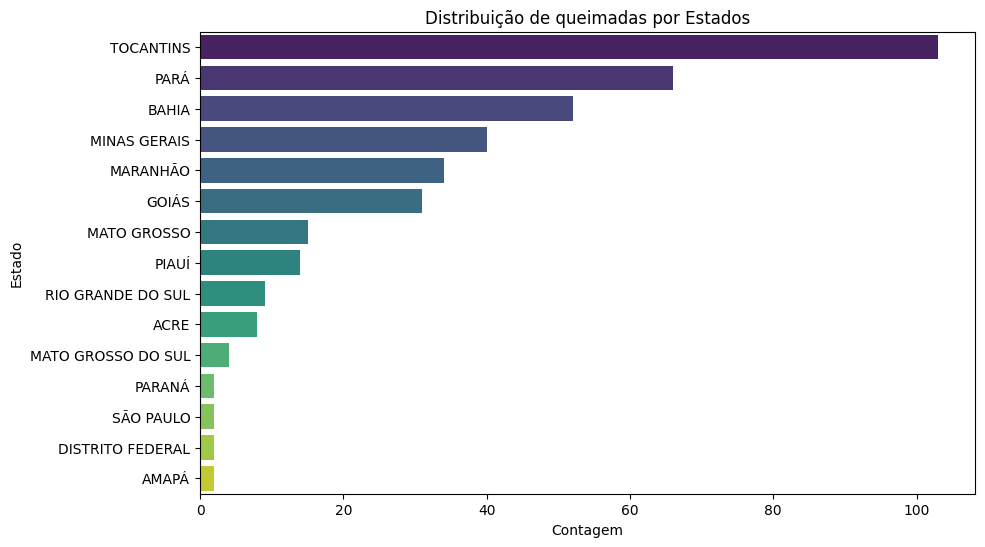

In [ ]:
#grafico de barra dos estados com maior foco de queimada
plt.figure(figsize=(10, 6))
sns.countplot(y='Estado', data=dfTeste_normalized, order=dfTeste_normalized['Estado'].value_counts().index, palette='viridis')
plt.title('Distribuição de queimadas por Estados')
plt.xlabel('Contagem')
plt.ylabel('Estado')
plt.show()

**Reasoning**:
Convert the 'DataHora' column to datetime objects to enable time-based analysis.



In [ ]:
dfTeste_normalized['DataHora'] = pd.to_datetime(dfTeste_normalized['DataHora'])
display(dfTeste_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DataHora      384 non-null    datetime64[ns]
 1   Satelite      384 non-null    object        
 2   Pais          384 non-null    object        
 3   Estado        384 non-null    object        
 4   Municipio     384 non-null    object        
 5   Bioma         384 non-null    object        
 6   DiaSemChuva   384 non-null    int64         
 7   Precipitacao  384 non-null    float64       
 8   RiscoFogo     384 non-null    float64       
 9   FRP           384 non-null    float64       
 10  Latitude      384 non-null    float64       
 11  Longitude     384 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 36.1+ KB


None

In [ ]:
df_octuber = dfTeste_normalized[dfTeste_normalized['DataHora'].dt.year == 2025].copy()
display(df_octuber)

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,FRP,Latitude,Longitude
0,2025-10-10 18:19:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,TRIUNFO,Pampa,4,0.0000,0.00,10.9,-24.566209,-51.677340
1,2025-10-10 18:19:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BROCHIER,Mata Atlântica,4,0.0000,0.00,6.9,-24.566209,-51.659860
2,2025-10-10 18:19:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,POUSO NOVO,Mata Atlântica,4,0.0000,0.00,16.6,-24.566209,-52.241950
3,2025-10-10 18:19:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,SENTINELA DO SUL,Pampa,4,0.0000,0.03,20.4,-24.566209,-51.665660
4,2025-10-10 18:19:00,AQUA_M-T,Brasil,SÃO PAULO,RUBIÁCEA,Mata Atlântica,3,0.0000,1.00,9.1,-21.463480,-50.907400
...,...,...,...,...,...,...,...,...,...,...,...,...
379,2025-10-10 20:02:00,AQUA_M-T,Brasil,ACRE,MARECHAL THAUMATURGO,Amazônia,1,0.0000,0.65,8.4,-8.847010,-55.631741
380,2025-10-10 20:02:00,AQUA_M-T,Brasil,ACRE,MARECHAL THAUMATURGO,Amazônia,1,0.0000,0.54,8.4,-8.850120,-55.631741
381,2025-10-10 20:02:00,AQUA_M-T,Brasil,ACRE,CRUZEIRO DO SUL,Amazônia,2,0.0000,0.14,6.1,-8.046860,-55.631741
382,2025-10-10 20:02:00,AQUA_M-T,Brasil,ACRE,CRUZEIRO DO SUL,Amazônia,2,0.0000,0.15,7.6,-7.880680,-55.631741


In [ ]:
# Agrupar por mês e contar a quantidade de queimadas
df_octuber['MesAno'] = df_octuber['DataHora'].dt.to_period('M')
queimadas_por_mes = df_octuber.groupby('MesAno').size().reset_index(name='ContagemQueimadas')
queimadas_por_mes['MesAno'] = queimadas_por_mes['MesAno'].astype(str) # Converter para string para plotagem

display(queimadas_por_mes)

,MesAno,ContagemQueimadas
0,2025-10,384


In [ ]:
# Agrupar por hora e contar a quantidade de queimadas
df_octuber['HoraDia'] = df_octuber['DataHora'].dt.to_period('H')
queimadas_por_hora = df_octuber.groupby('HoraDia').size().reset_index(name='ContagemQueimadas')
queimadas_por_hora['HoraDia'] = queimadas_por_hora['HoraDia'].astype(str) # Converter para string para plotagem

display(queimadas_por_hora)

/tmp/ipython-input-2857582799.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_octuber['HoraDia'] = df_octuber['DataHora'].dt.to_period('H')


,HoraDia,ContagemQueimadas
0,2025-10-10 18:00,376
1,2025-10-10 20:00,8


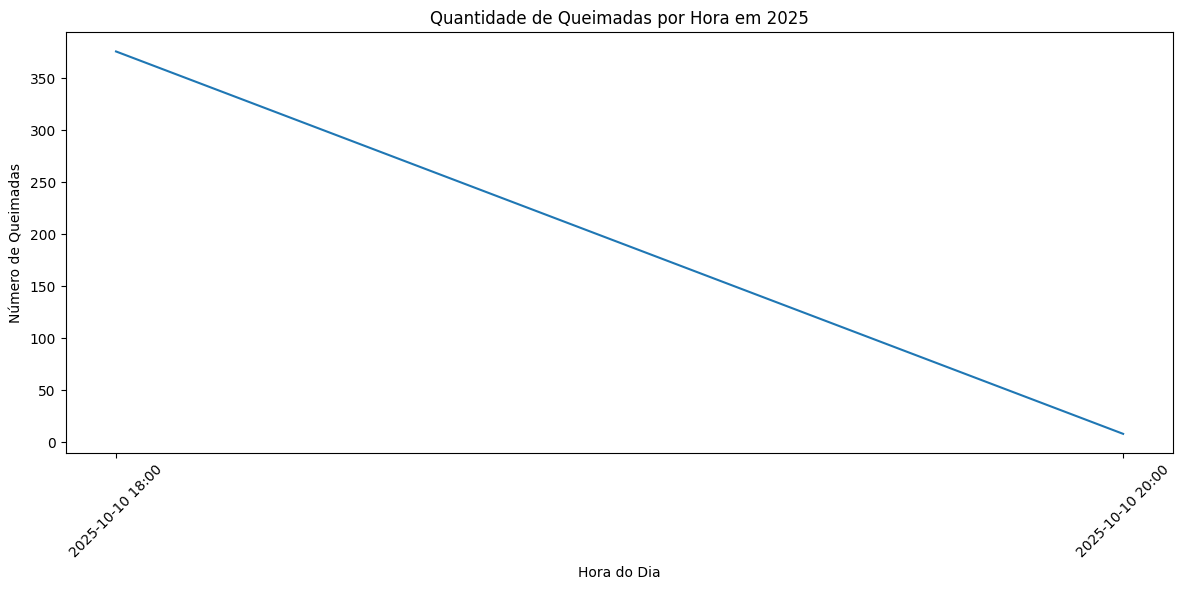

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='HoraDia', y='ContagemQueimadas', data=queimadas_por_hora)
plt.title('Quantidade de Queimadas por Hora em 2025')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Queimadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()